<a href="https://colab.research.google.com/github/Gokul0Krishna/exp/blob/main/exp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/football players.v2i.yolov5pytorch.zip"

Archive:  /content/football players.v2i.yolov5pytorch.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/yt-NfzkB0v31Pg-0009_jpg.rf.8c94b6f7e2f93d77bf33fa4e740b90e0.jpg  
 extracting: test/images/yt-NfzkB0v31Pg-0011_jpg.rf.dd8cce210aef4b83e11dd8e851add934.jpg  
 extracting: test/images/yt-NfzkB0v31Pg-0012_jpg.rf.b5165914840af0159721c1b774c0f743.jpg  
 extracting: test/images/yt-NfzkB0v31Pg-0024_jpg.rf.6032a83254029bf74e2710a86f9f36cb.jpg  
 extracting: test/images/yt-NfzkB0v31Pg-0034_jpg.rf.cdfec2540651bc946b57fc5b9f05dcf9.jpg  
 extracting: test/images/yt-NfzkB0v31Pg-0038_jpg.rf.467cd1fbc8e0727dbcf5e0c1b6dcd271.jpg  
 extracting: test/images/yt-NfzkB0v31Pg-0051_jpg.rf.50556582ff74153fc5e60ad3c2bdf913.jpg  
 extracting: test/images/yt-NfzkB0v31Pg-0055_jpg.rf.09e34420f04db6f62b2c0cb8e7ca7f00.jpg  
 extracting: test/images/yt-NfzkB0v31Pg-0061_jpg.rf.cf1

In [ ]:
!pip install opencv-python matplotlib numpy torch torchvision ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
import cv2
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

In [ ]:
from skimage.feature import local_binary_pattern
def er(image):
  grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
  grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
  grad_mag = np.sqrt(grad_x**2 + grad_y**2)
  return np.mean(grad_mag)

def obj_found(image):
  image = (image * 255).astype(np.uint8)
  params = cv2.SimpleBlobDetector_Params()
  params.filterByArea = True
  params.minArea = 10  # Minimum blob size (adjust for small objects)
  params.maxArea = 1000
  detector = cv2.SimpleBlobDetector_create(params)
  keypoints = detector.detect(image)
  return len(keypoints)

def complexity(image):
  image = np.array(image).reshape(len(image), -1)
  lbp = local_binary_pattern(image, 8, 1, method="uniform")#greater the no. more complex the image
  hist, _ = np.histogram(lbp, bins=8+2, range=(0, 8+2))
  hist = hist.astype(np.float32) / hist.sum()
  grad_mag=-np.sum(hist * np.log(hist + 1e-6))
  return grad_mag

def ed(image):
  local_var = cv2.Laplacian(image, cv2.CV_32F).var()#The Laplacian operator highlights regions of rapid intensity change (edges),High variance = many strong edges = likely not occluded
  return local_var / (np.mean(image)+ 1e-6)

In [ ]:
def is_blurry(image):
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(image, cv2.CV_64F).var()

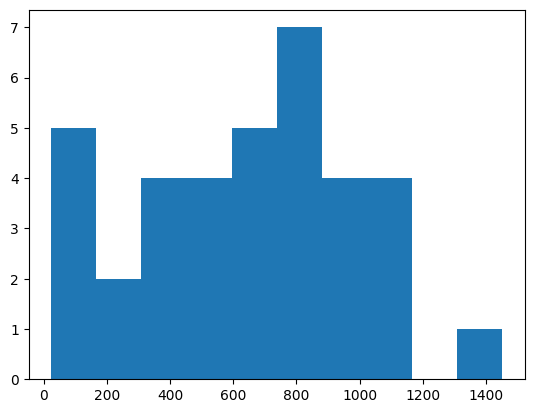

In [ ]:
import cv2
import numpy as np
from pathlib import Path
data1=[]
image_dir = Path('/content/test/images')
for i in image_dir.glob('*.jpg'):
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    # img = cv2.resize(img, (28,28))
    # img = np.array(img, dtype=np.float32) / 255.0
    # img = img.flatten()
    data1.append(is_blurry(img))
plt.hist(data1)
plt.show()


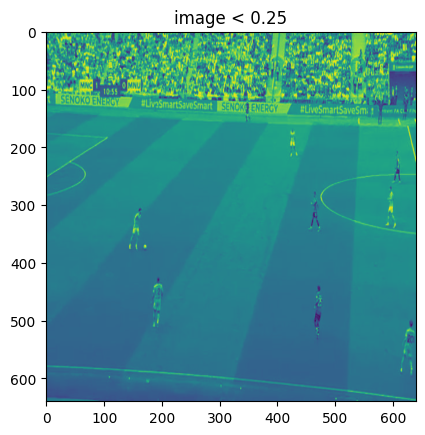

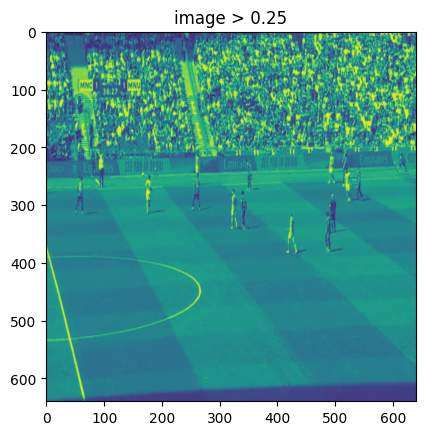

In [ ]:
l1,l2=True,True
import cv2
import numpy as np
from pathlib import Path
image_dir = Path('/content/test/images')
for i in image_dir.glob('*.jpg'):
    imga = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    # img = cv2.resize(imga, (28,28))
    # img = np.array(img, dtype=np.float32) / 255.0
    # img = img.flatten()
    if l1:
      if is_blurry(imga)>1000:
        plt.imshow(imga)
        plt.title("image > 0.25")
        plt.show()
        l1=False
    if l2:
      if is_blurry(imga)<1000:
        plt.imshow(imga)
        plt.title("image < 0.25")
        plt.show()
        l2=False